<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/Analise_credito_banco%20completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_banco=pd.read_excel('/content/db banco.xlsx')

In [ ]:
df_banco

Safra Estado  Renda Mensal  Endividamento  \
0     2020-05-01 00:00:00 UTC     MS          1076       26 a 50%   
1     2020-05-01 00:00:00 UTC     MG         12709        Até 25%   
2     2020-06-01 00:00:00 UTC     MS          2518  Acima de 100%   
3     2020-05-01 00:00:00 UTC     RS          1090        Até 25%   
4     2020-10-01 00:00:00 UTC     RJ          1155        Até 25%   
...                       ...    ...           ...            ...   
9995  2020-07-01 00:00:00 UTC     MS          4281        Até 25%   
9996  2020-07-01 00:00:00 UTC     MG          4274        Até 25%   
9997  2020-05-01 00:00:00 UTC     RS          3365        Até 25%   
9998  2020-06-01 00:00:00 UTC     SC          2393        Até 25%   
9999  2020-10-01 00:00:00 UTC     TO          1292        Até 25%   

      Quantidade de Cheques sem Fundo  Quantidade de Restritivos  \
0                                   0                          2   
1                                   0                          0   
2                                   0                          4   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
9995                                0                          0   
9996                                0                          2   
9997                                0                          0   
9998                                0                          0   
9999                                0                          0   

      Valor dos Restritivos  Quantidade de Protestos  Valor dos Protestos  \
0                       418                        0                    0   
1                         0                        0                    0   
2                     32306                        0                    0   
3                         0                        0                    0   
4                         0                        0                    0   
...                     ...                      ...                  ...   
9995                      0                        0                    0   
9996                    352                        0                    0   
9997                      0                        0                    0   
9998                      0                        0                    0   
9999                      0                        0                    0   

      Modelo Score 1  Modelo Score 2  Modelo Score 3  Modelo Score 4  \
0                141             236             196             405   
1                767             646             805             946   
2                 67             238             196             563   
3                245             523             290             698   
4                697             718             645             816   
...              ...             ...             ...             ...   
9995             574             614             418             761   
9996             126             213             243             531   
9997             627             649             491             655   
9998             605             658             740             892   
9999             572             665             548             711   

     Performance 30D3M EVER Performance 60D6M EVER Performance 60D9M EVER  \
0                       BOM                    MAU                    MAU   
1                       BOM                    BOM                    BOM   
2                       BOM                    BOM                    BOM   
3                       MAU                    BOM                    MAU   
4                       BOM                    BOM                    NaN   
...                     ...                    ...                    ...   
9995                    MAU                    MA

**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df_banco['Estado'] = encoder.fit_transform(df_banco['Estado'])

In [ ]:
df_banco['Endividamento'] = encoder.fit_transform(df_banco['Endividamento'])

In [ ]:
df_banco['Safra'] = encoder.fit_transform(df_banco['Safra'])

In [ ]:
df_banco['Performance 30D3M EVER'] = encoder.fit_transform(df_banco['Performance 30D3M EVER'])
df_banco['Performance 60D6M EVER'] = encoder.fit_transform(df_banco['Performance 60D6M EVER'])
df_banco['Performance 60D9M EVER'] = encoder.fit_transform(df_banco['Performance 60D9M EVER'])
df_banco['Performance 90D9M EVER'] = encoder.fit_transform(df_banco['Performance 90D9M EVER'])
df_banco['Performance 90D12M EVER'] = encoder.fit_transform(df_banco['Performance 90D12M EVER'])

**Conversão colunas com valores inteiros para categóricos**

In [ ]:
df_banco['Estado'] = df_banco['Estado'].astype('category')
df_banco['Safra'] = df_banco['Safra'].astype('category')
df_banco['Endividamento'] = df_banco['Endividamento'].astype('category')


In [ ]:
df_banco['Performance 30D3M EVER'] = df_banco['Performance 30D3M EVER'].astype('category')
df_banco['Performance 60D6M EVER'] = df_banco['Performance 60D6M EVER'].astype('category')
df_banco['Performance 60D9M EVER'] = df_banco['Performance 60D9M EVER'].astype('category')
df_banco['Performance 90D9M EVER'] = df_banco['Performance 90D9M EVER'].astype('category')
df_banco['Performance 90D12M EVER'] = df_banco['Performance 90D12M EVER'].astype('category')

In [ ]:
df_banco.sample(30)

Safra Estado  Renda Mensal Endividamento  \
7163     1      1          3492             4   
7895     5      6          3492             4   
8833     2      4          1385             0   
772      2      5          3492             4   
5301     5      9          1120             4   
1773     1      3          2393             3   
6110     0      8          3366             4   
6493     3      0          3368             4   
6692     0      1          1287             4   
1837     5      6          3492             3   
9273     0      7          4147             3   
3174     4      9          4143             4   
9705     2      2          2518             4   
5897     3      6          3492             4   
2912     0      2          3492             4   
8612     3      5          3367             4   
7902     1      6          3492             4   
3256     1      3          4277             0   
9782     5      8          2518             3   
3652     5      2          4278             4   
3247     1      0          4017             4   
1803     0      5          2103             4   
5379     3      9          3367             4   
3913     3      2          3371             4   
9246     4      3          3366             4   
3596     0      7          3367             4   
8415     5      8          1145             4   
1653     0      3          3544             4   
5633     0      2          3371             4   
4508     3      1          3367             4   

      Quantidade de Cheques sem Fundo  Quantidade de Restritivos  \
7163                                0                          0   
7895                                0                          0   
8833                                0                          1   
772                                 0                          0   
5301                                0                          1   
1773                                0                          1   
6110                                0                          0   
6493                                0                          0   
6692                                0                          0   
1837                                0                          3   
9273                                0                          3   
3174                                0                          0   
9705                                0                          0   
5897                                0                          0   
2912                                0                          0   
8612                                0                          0   
7902                                0                          0   
3256                                0                          1   
9782                                0                          4   
3652                                0                          0   
3247                                0                          0   
1803                                0                          0   
5379                                0                          1   
3913                                0                          0   
9246                                0                          0   
3596                                0                          0   
8415                                0                          1   
1653                                0                          0   
5633                                0                          0   
4508                                0                          0   

      Valor dos Restritivos  Quantidade de Protestos  Valor dos Protestos  \
7163                      0                        0                    0   
7895                      0                        0                    0   
8833                    581                        0                    0   
772                       0                        0                

**Valores NaN**

In [ ]:
# As colunas vazias foram marcadas como 2 sendo que as mesmas não apresentam valores#
df_banco['Performance 60D9M EVER'] = df_banco['Performance 60D9M EVER'].replace(2, np.nan)
df_banco['Performance 90D9M EVER'] = df_banco['Performance 90D9M EVER'].replace(2, np.nan)
df_banco['Performance 90D12M EVER'] = df_banco['Performance 90D12M EVER'].replace(2, np.nan)

In [ ]:
df_banco.sample(30)

Safra Estado  Renda Mensal Endividamento  \
1733     5      7          4521             3   
7900     2      0          1276             4   
5038     5      4          3299             4   
5474     5      8          3366             4   
6092     0      5          3883             4   
5367     4      4          1394             3   
9794     2      1          4274             4   
6565     5      4          3492             4   
1106     1      8          4404             3   
4173     5      0          1197             4   
4956     1      7          1605             2   
1032     2      6          1240             4   
748      3      8          3367             4   
3484     4      3          3367             4   
4686     3      2          3367             1   
3713     2      8          1533             4   
3234     0      6          1271             4   
7625     3      3          3374             4   
4658     0      1          1397             4   
7999     0      4          2518             4   
2988     4      0          3492             4   
2745     2      3          1377             4   
6072     1      2          1105             4   
2263     2      8          4278             4   
9627     2      4          2401             4   
5901     2      4          1521             4   
547      0      7          3303             1   
990      5      7          2913             4   
2763     1      2          1234             4   
9199     1      0          1367             4   

      Quantidade de Cheques sem Fundo  Quantidade de Restritivos  \
1733                                0                          4   
7900                                0                          0   
5038                                0                          0   
5474                                0                          0   
6092                                0                          0   
5367                                0                          3   
9794                                0                          2   
6565                                0                          0   
1106                                0                          1   
4173                                0                          0   
4956                                0                          1   
1032                                0                          0   
748                                 0                          0   
3484                                0                          0   
4686                                0                          2   
3713                                0                          0   
3234                                0                          0   
7625                                0                          0   
4658                                0                          0   
7999                                0                          0   
2988                                0                          0   
2745                                0                          0   
6072                                0                          0   
2263                                0                          0   
9627                                0                          0   
5901                                0                          0   
547                                 0                          1   
990                                 0                          0   
2763                                0                          0   
9199                                0                          0   

      Valor dos Restritivos  Quantidade de Protestos  Valor dos Protestos  \
1733                  26611                        0                    0   
7900                      0                        0                    0   
5038                      0                        0                    0   
5474                      0                        0                

In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Safra                            10000 non-null  category
 1   Estado                           10000 non-null  category
 2   Renda Mensal                     10000 non-null  int64   
 3   Endividamento                    10000 non-null  category
 4   Quantidade de Cheques sem Fundo  10000 non-null  int64   
 5   Quantidade de Restritivos        10000 non-null  int64   
 6   Valor dos Restritivos            10000 non-null  int64   
 7   Quantidade de Protestos          10000 non-null  int64   
 8   Valor dos Protestos              10000 non-null  int64   
 9   Modelo Score 1                   10000 non-null  int64   
 10  Modelo Score 2                   10000 non-null  int64   
 11  Modelo Score 3                   10000 non-null  int64   
 12  Model

**Valores Vazios**

In [ ]:
df_banco.isnull().sum()

Safra                                 0
Estado                                0
Renda Mensal                          0
Endividamento                         0
Quantidade de Cheques sem Fundo       0
Quantidade de Restritivos             0
Valor dos Restritivos                 0
Quantidade de Protestos               0
Valor dos Protestos                   0
Modelo Score 1                        0
Modelo Score 2                        0
Modelo Score 3                        0
Modelo Score 4                        0
Performance 30D3M EVER                0
Performance 60D6M EVER                0
Performance 60D9M EVER             1665
Performance 90D9M EVER             1665
Performance 90D12M EVER            6646
dtype: int64

**Estatística**

In [ ]:
df_banco.describe()

Renda Mensal  Quantidade de Cheques sem Fundo  \
count  10000.000000                     10000.000000   
mean    2780.155700                         0.164900   
std     1464.592111                         1.564146   
min     1041.000000                         0.000000   
25%     1404.000000                         0.000000   
50%     3365.000000                         0.000000   
75%     3492.000000                         0.000000   
max    33564.000000                        64.000000   

       Quantidade de Restritivos  Valor dos Restritivos  \
count               10000.000000            10000.00000   
mean                    0.711100             1635.66340   
std                     1.823285            10741.23154   
min                    -7.000000                0.00000   
25%                     0.000000                0.00000   
50%                     0.000000                0.00000   
75%                     1.000000              145.00000   
max                    35.000000           462266.00000   

       Quantidade de Protestos  Valor dos Protestos  Modelo Score 1  \
count             10000.000000         10000.000000    10000.000000   
mean                  0.152900           209.724300      459.182800   
std                   1.173908          2700.805532      264.013507   
min                   0.000000             0.000000        1.000000   
25%                   0.000000             0.000000      216.000000   
50%                   0.000000             0.000000      481.000000   
75%                   0.000000             0.000000      672.250000   
max                  37.000000        133742.000000      999.000000   

       Modelo Score 2  Modelo Score 3  Modelo Score 4  
count    10000.000000    10000.000000    10000.000000  
mean       524.183800      483.280100      695.888500  
std        200.494433      215.561897      115.237171  
min          1.000000        1.000000        1.000000  
25%        253.000000      277.000000      630.000000  
50%        627.000000      482.000000      700.000000  
75%        669.000000      669.000000      772.000000  
max        811.000000      922.000000      999.000000

<ipython-input-22-08362599de8a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_banco.corr(), annot=True);


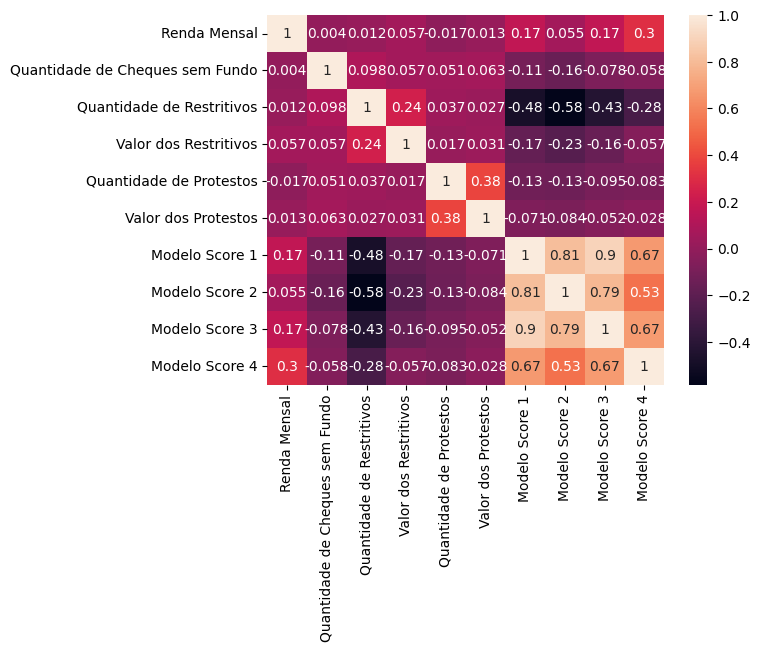

In [ ]:
sns.heatmap(df_banco.corr(), annot=True);

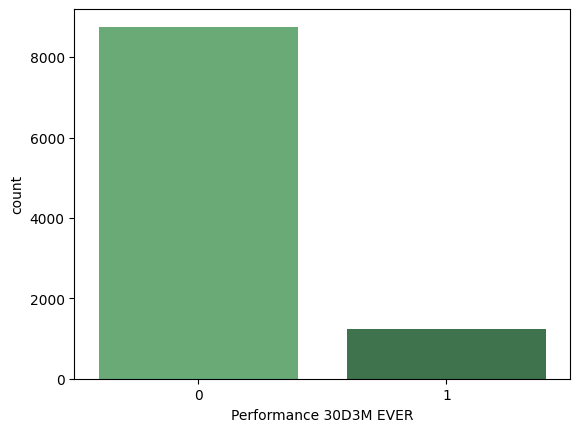

In [ ]:
sns.countplot(x="Performance 30D3M EVER", data=df_banco, palette="Greens_d")

plt.show()

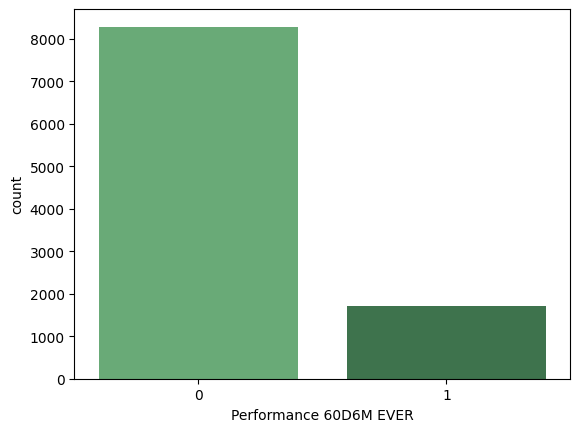

In [ ]:
sns.countplot(x="Performance 60D6M EVER", data=df_banco, palette="Greens_d")

plt.show()

In [ ]:
# A base se mostra desbalanceada devido ao numero de bons pagadores serem muito maiores que os maus pagadores

**Divisão entre classe e previsores**

In [ ]:
X_banco=df_banco.iloc[:,0:13].values
Y_banco=df_banco.iloc[:,13].values

In [ ]:
X_banco

array([[    0,     3,  1076, ...,   236,   196,   405],
       [    0,     2, 12709, ...,   646,   805,   946],
       [    1,     3,  2518, ...,   238,   196,   563],
       ...,
       [    0,     6,  3365, ...,   649,   491,   655],
       [    1,     7,  2393, ...,   658,   740,   892],
       [    5,     9,  1292, ...,   665,   548,   711]])

In [ ]:
Y_banco

[0, 0, 0, 1, 0, ..., 1, 0, 0, 0, 0]
Length: 10000
Categories (2, int64): [0, 1]

**Padronização dos dados**

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler()
X_banco = scaler.fit_transform(X_banco)

In [ ]:
X_banco

array([[-1.45521182, -0.51786409, -1.16362836, ..., -1.43743747,
        -1.33277017, -2.52438551],
       [-1.45521182, -0.87142734,  6.77959461, ...,  0.60760934,
         1.49254572,  2.17051498],
       [-0.87111781, -0.51786409, -0.17900466, ..., -1.42746163,
        -1.33277017, -1.15323158],
       ...,
       [-1.45521182,  0.54282566,  0.39934227, ...,  0.6225731 ,
         0.03581471, -0.35483815],
       [-0.87111781,  0.8963889 , -0.26435692, ...,  0.66746437,
         1.19099312,  1.70189275],
       [ 1.46525824,  1.6035154 , -1.01613965, ...,  0.70237981,
         0.30025314,  0.13114046]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_banco, Y_banco, test_size=0.3)

**Usando undersampling**

In [ ]:
# Create a TomekLinks object
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')

In [ ]:
# Fit and transform the dataset
X_resampled, Y_resampled = tl.fit_resample(X_banco, Y_banco)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_resampled, Y_resampled, test_size=0.3)

**Radom Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, criterion='entropy', random_state = 0)
random_forest.fit(X_train_under, y_train_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
previsoes=random_forest.predict(X_test_under)
accuracy_score(y_test_under, previsoes)

0.8657601115760112

0.8657601115760112

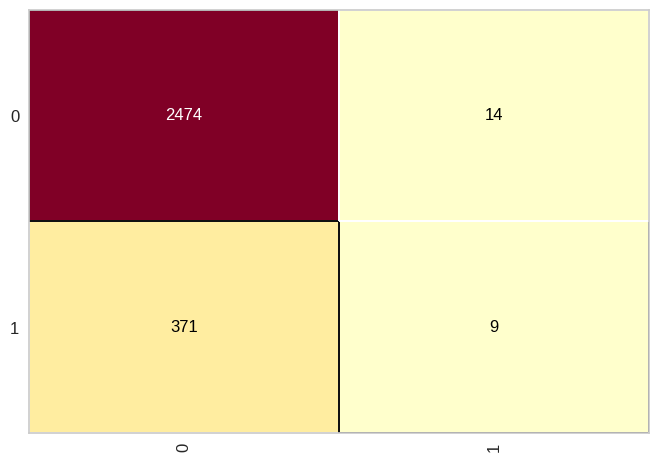

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)

**Árvore de decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
arvore_risco_banco = DecisionTreeClassifier(criterion='entropy',max_depth=5)
arvore_risco_banco.fit(X_train_under, y_train_under)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
arvore_risco_banco.feature_importances_

array([0.04703046, 0.02689368, 0.13355063, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10435358,
       0.61257517, 0.04192889, 0.03366759])

In [ ]:
arvore_risco_banco.classes_

array([0, 1])

In [ ]:
# Exporte a árvore para um arquivo .dot
dot_data = export_graphviz(arvore_risco_banco, out_file=None)

In [ ]:
# Renderize a árvore com o Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

In [ ]:
# Exiba a árvore no Jupyter Notebook ou em outra interface
graph.view()

'decision_tree.pdf'

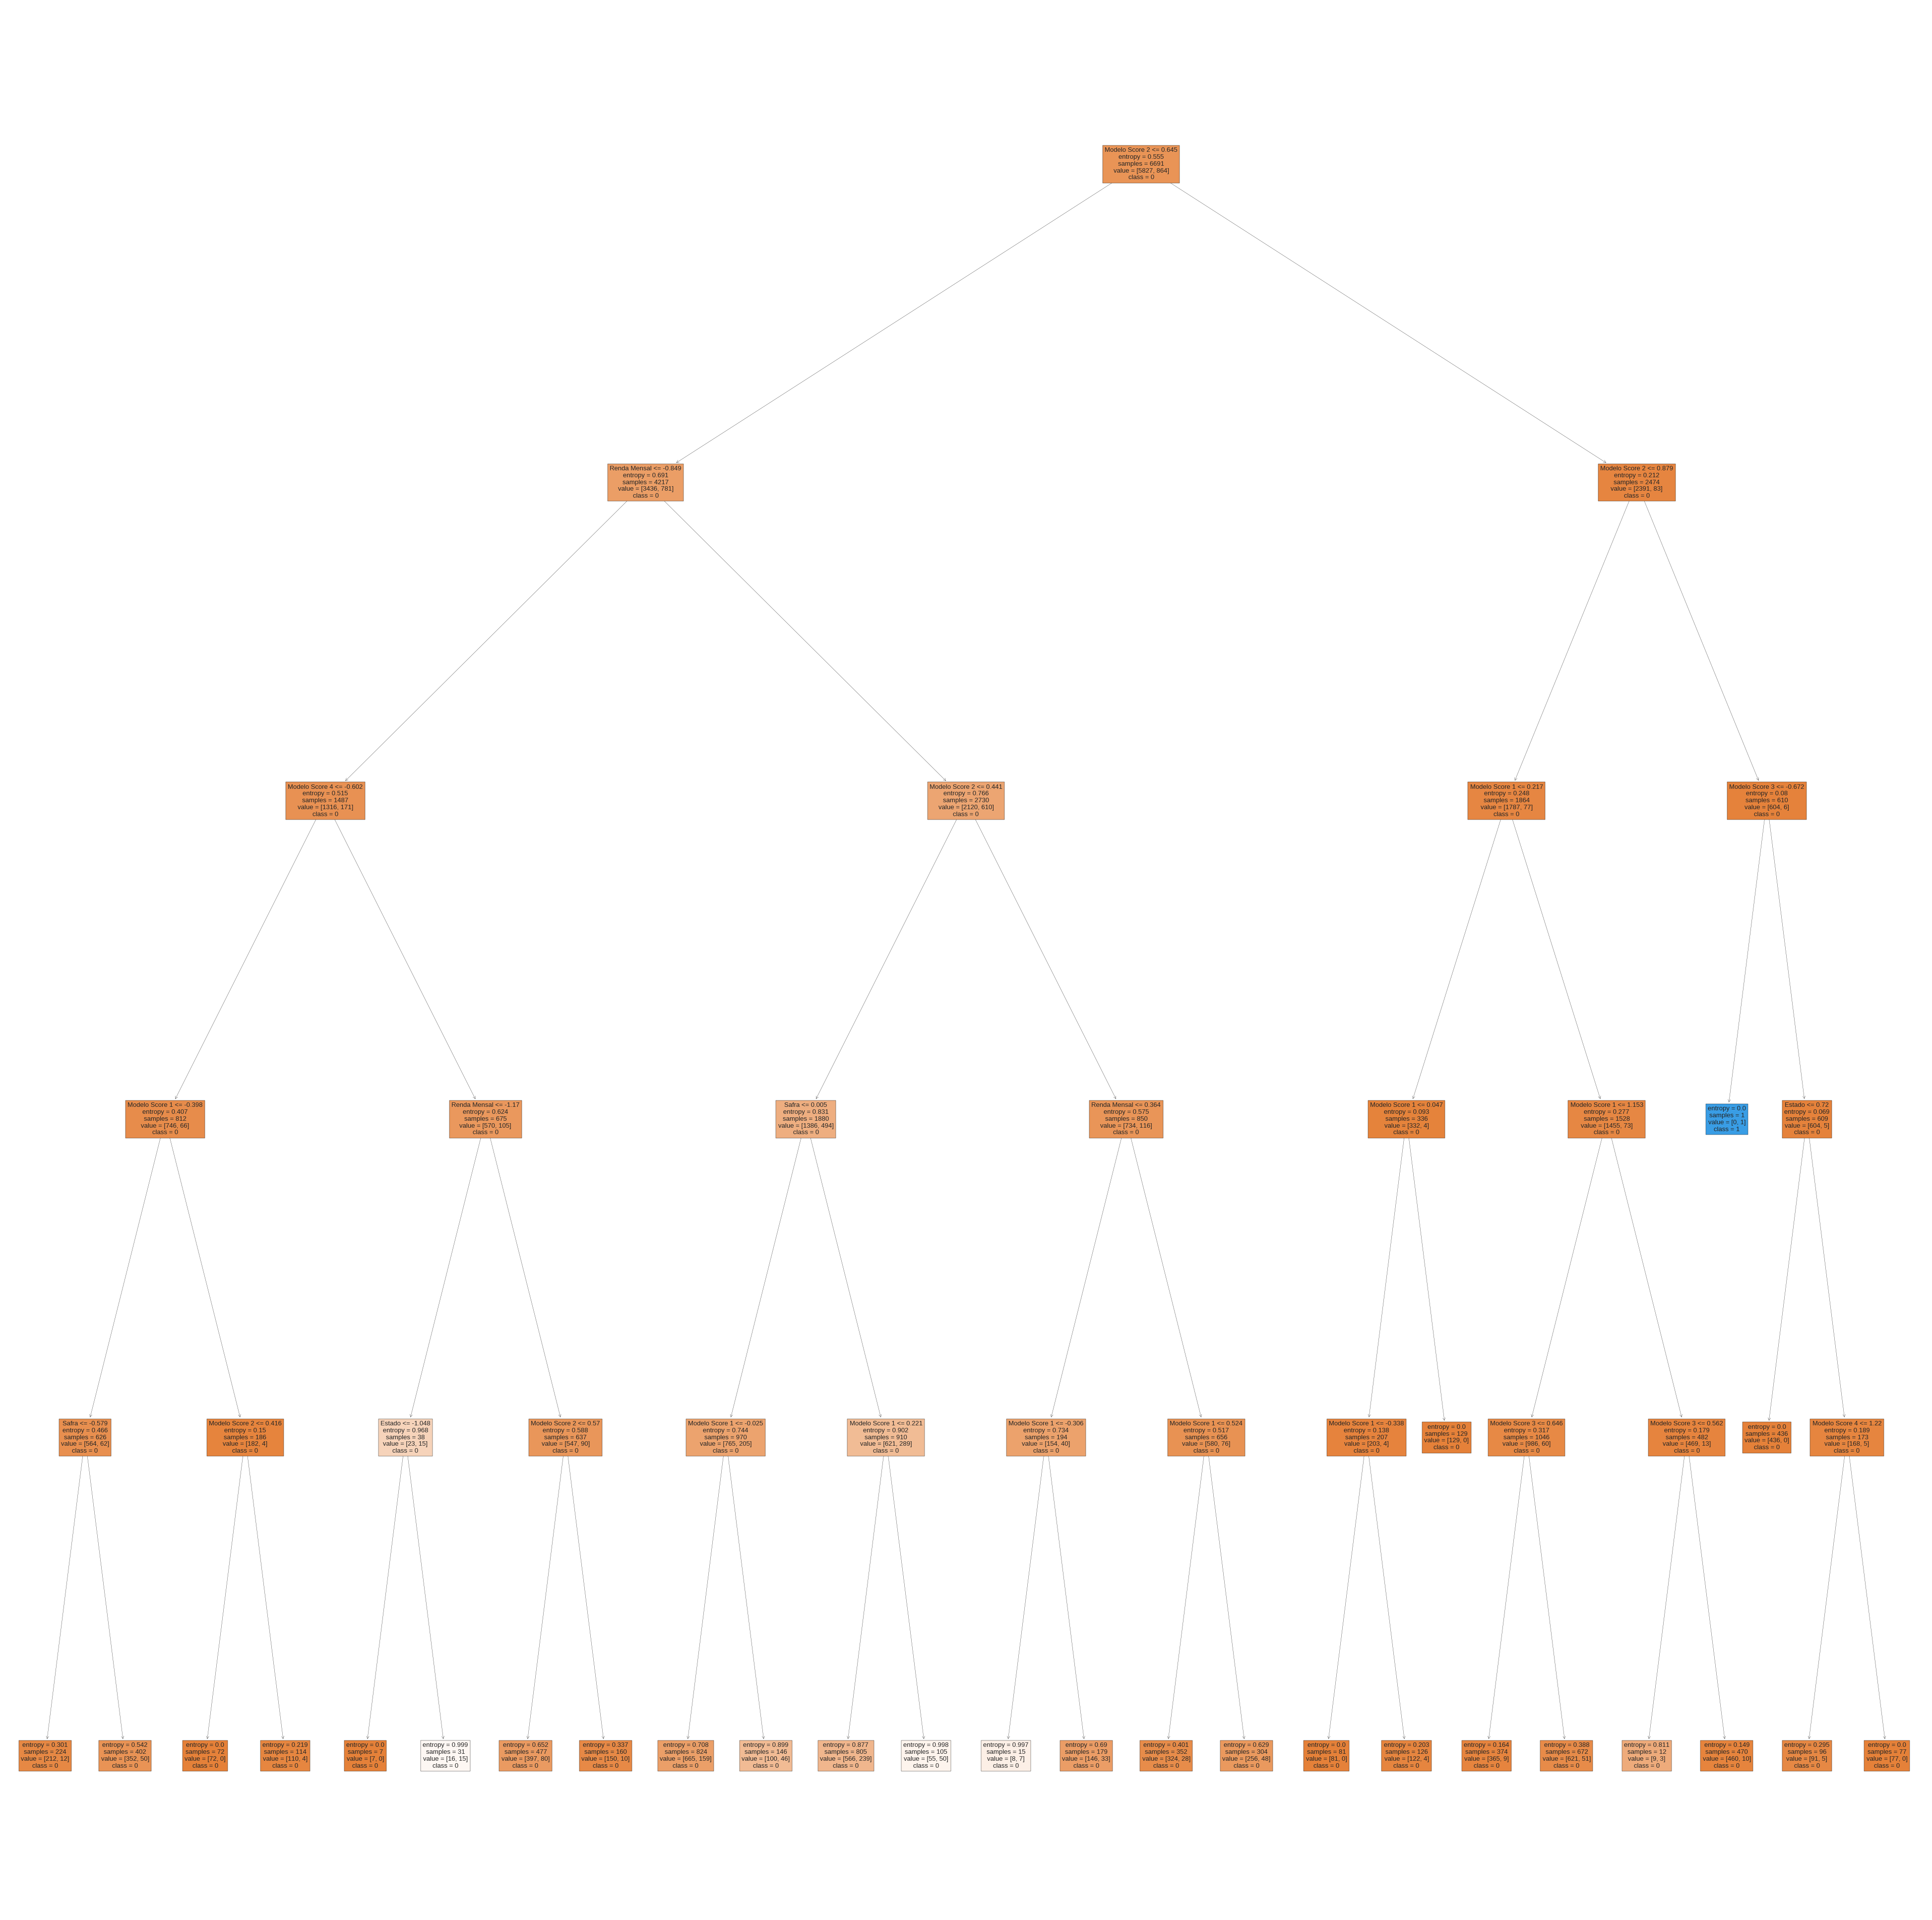

In [ ]:
from sklearn import tree
previsores = ['Safra','Estado','Renda Mensal', 'Endividamento','Quantidade de Cheques sem Fundo','Quantidade de Restritivos', 'Valor dos Restritivos', 'Quantidade de Protestos', 'Valor dos Protestos','Modelo Score 1', 'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(50,50))
class_names_str = [str(cls) for cls in arvore_risco_banco.classes_]
tree.plot_tree(arvore_risco_banco, feature_names=previsores, class_names=class_names_str, filled=True, ax=eixos)
figura.savefig('arvore_credit.png')

In [ ]:
from sklearn.metrics import accuracy_score
previsoes=arvore_risco_banco.predict(X_test_under)
accuracy_score(y_test_under, previsoes)

0.8675034867503487

0.8675034867503487

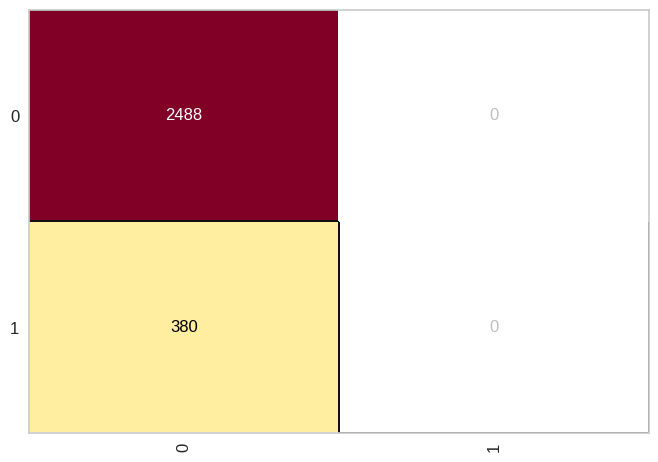

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_risco_banco)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)

**Redes Neurais Artificiais**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_train_under, y_train_under)

Iteration 1, loss = 0.59821846
Iteration 2, loss = 0.43499447
Iteration 3, loss = 0.38352219
Iteration 4, loss = 0.37130443
Iteration 5, loss = 0.36564080
Iteration 6, loss = 0.36185488
Iteration 7, loss = 0.35931377
Iteration 8, loss = 0.35735473
Iteration 9, loss = 0.35590341
Iteration 10, loss = 0.35478141
Iteration 11, loss = 0.35361802
Iteration 12, loss = 0.35254929
Iteration 13, loss = 0.35170841
Iteration 14, loss = 0.35089687
Iteration 15, loss = 0.35000957
Iteration 16, loss = 0.34927878
Iteration 17, loss = 0.34869477
Iteration 18, loss = 0.34821033
Iteration 19, loss = 0.34718953
Iteration 20, loss = 0.34658036
Iteration 21, loss = 0.34584788
Iteration 22, loss = 0.34531829
Iteration 23, loss = 0.34496842
Iteration 24, loss = 0.34438888
Iteration 25, loss = 0.34361696
Iteration 26, loss = 0.34325328
Iteration 27, loss = 0.34257569
Iteration 28, loss = 0.34234064
Iteration 29, loss = 0.34195640
Iteration 30, loss = 0.34131612
Iteration 31, loss = 0.34068988
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_credit.predict(X_test_under)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test_under, previsoes)

0.8483263598326359

0.8483263598326359

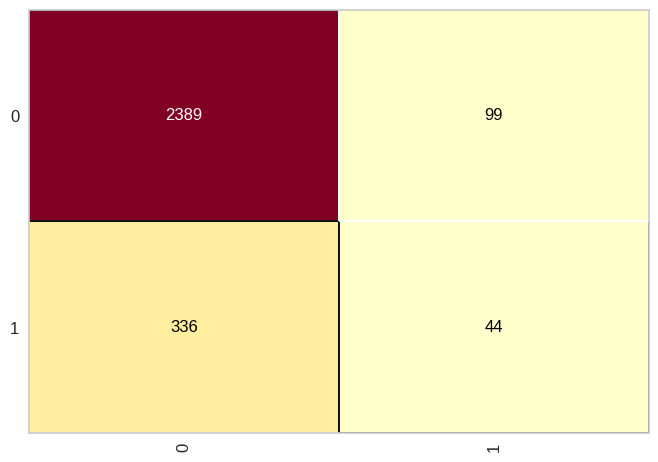

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)

**Usando oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(sampling_strategy='minority')

In [ ]:
X_over,Y_over=smote.fit_resample(X_banco, Y_banco)

In [ ]:
X_over.shape

(17512, 13)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X_over, Y_over, test_size = 0.15, random_state = 0)

**Radom Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_over = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, criterion='entropy', random_state = 0)
random_forest_over.fit(X_train_over, Y_train_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes=random_forest_over.predict(X_test_over)
accuracy_score(Y_test_over, previsoes)

0.9036924248191854

0.9036924248191854

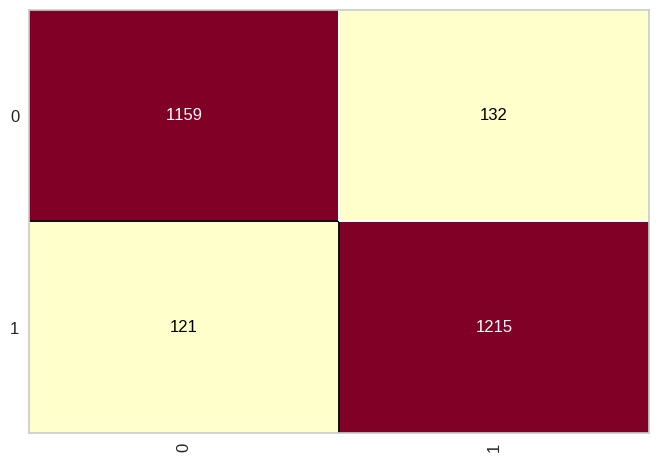

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_over)
cm.fit(X_train_over, Y_train_over)
cm.score(X_test_over, Y_test_over)

**Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_risco_banco2 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
arvore_risco_banco2.fit(X_train_over, Y_train_over)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
arvore_risco_banco2.feature_importances_

array([0.16313329, 0.00647834, 0.12169114, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01489327,
       0.62244006, 0.        , 0.07136389])

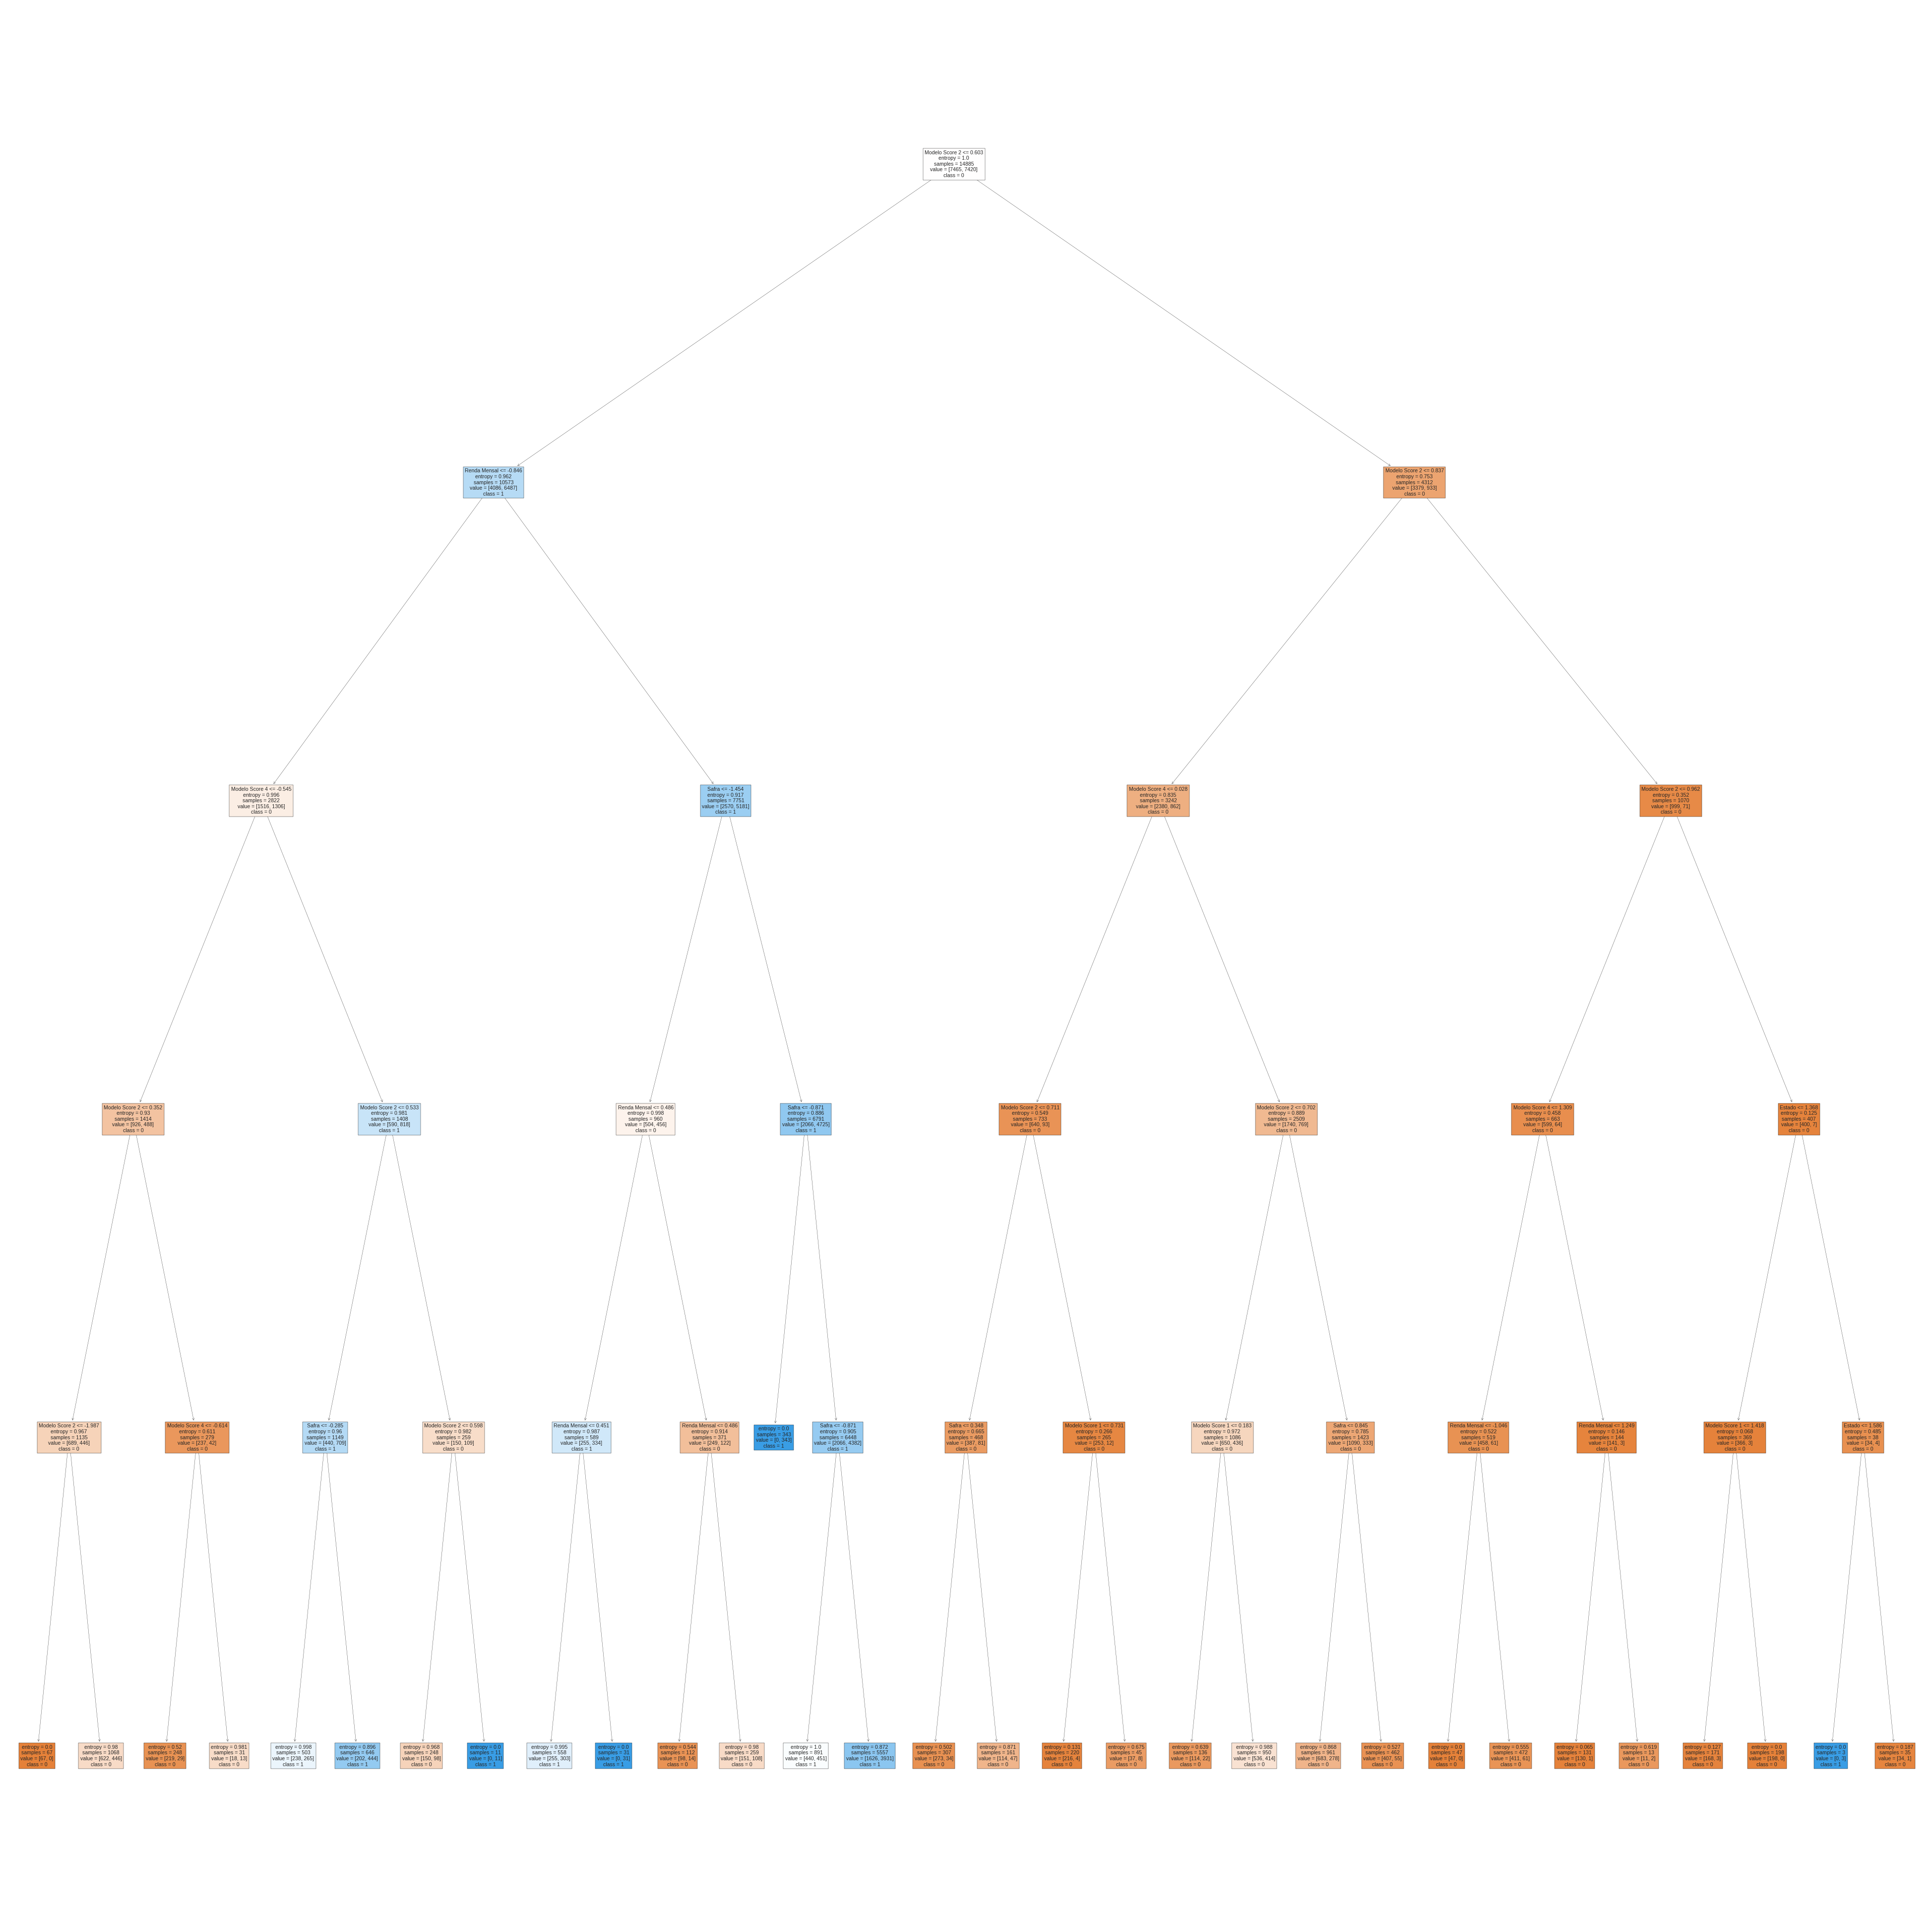

In [ ]:
from sklearn import tree
previsores = ['Safra','Estado','Renda Mensal', 'Endividamento','Quantidade de Cheques sem Fundo','Quantidade de Restritivos', 'Valor dos Restritivos', 'Quantidade de Protestos', 'Valor dos Protestos','Modelo Score 1', 'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(50,50))
class_names_str = [str(cls) for cls in arvore_risco_banco2.classes_]
tree.plot_tree(arvore_risco_banco2, feature_names=previsores, class_names=class_names_str, filled=True, ax=eixos)
figura.savefig('arvore_credit_over.png')

In [ ]:
from sklearn.metrics import accuracy_score
previsoes=arvore_risco_banco2.predict(X_test_over)
accuracy_score(Y_test_over, previsoes)

0.6943281309478493

0.6943281309478493

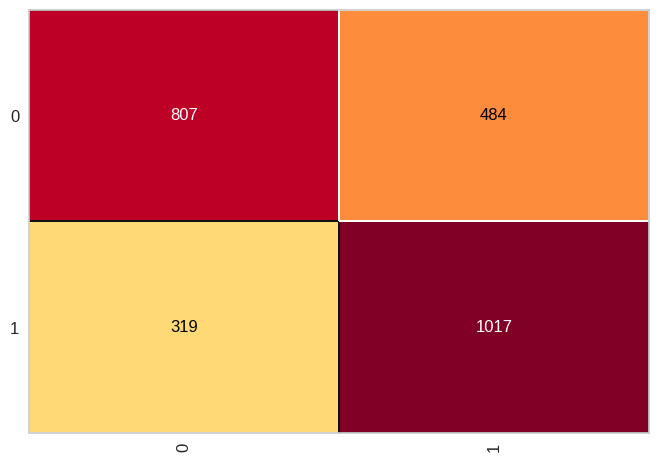

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_risco_banco2)
cm.fit(X_train_over, Y_train_over)
cm.score(X_test_over, Y_test_over)

Rede Neural artificial

In [ ]:
rede_neural_credit2 = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit2.fit(X_train_over, Y_train_over)

Iteration 1, loss = 0.65290744
Iteration 2, loss = 0.63212908
Iteration 3, loss = 0.62362084
Iteration 4, loss = 0.61830109
Iteration 5, loss = 0.61397598
Iteration 6, loss = 0.60986644
Iteration 7, loss = 0.60555546
Iteration 8, loss = 0.60101878
Iteration 9, loss = 0.59649536
Iteration 10, loss = 0.59181054
Iteration 11, loss = 0.58689082
Iteration 12, loss = 0.58173179
Iteration 13, loss = 0.57681087
Iteration 14, loss = 0.57252186
Iteration 15, loss = 0.56922994
Iteration 16, loss = 0.56526941
Iteration 17, loss = 0.56238475
Iteration 18, loss = 0.56030978
Iteration 19, loss = 0.55841841
Iteration 20, loss = 0.55621923
Iteration 21, loss = 0.55478098
Iteration 22, loss = 0.55319347
Iteration 23, loss = 0.55195015
Iteration 24, loss = 0.55084871
Iteration 25, loss = 0.54982506
Iteration 26, loss = 0.54829569
Iteration 27, loss = 0.54641395
Iteration 28, loss = 0.54648250
Iteration 29, loss = 0.54431894
Iteration 30, loss = 0.54304988
Iteration 31, loss = 0.54245974
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_credit2.predict(X_test_over)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_test_over, previsoes)

0.7601827179291968

0.7601827179291968

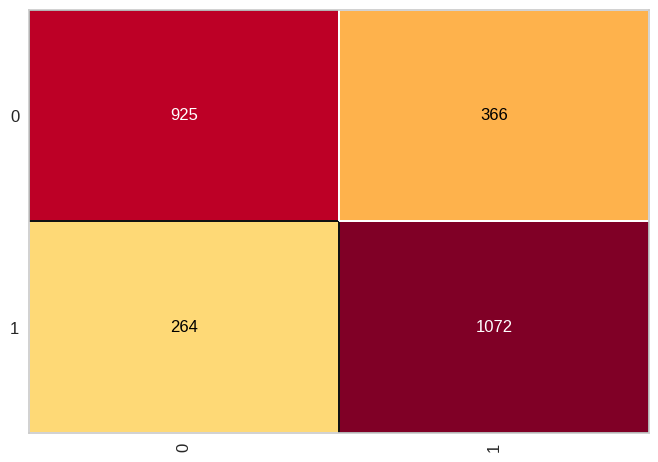

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit2)
cm.fit(X_train_over, Y_train_over)
cm.score(X_test_over, Y_test_over)

In [ ]:
df_banco.to_csv('dados.csv', index=False)  # index=False evita que o índice seja salvo como coluna

**Usando Random Forest com os dados originais**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import graphviz

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
random_forest_original = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=5, criterion='entropy', random_state = 0)
random_forest_original.fit(X_banco, Y_banco)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       random_state=0)

In [ ]:
random_forest_original.feature_importances_

array([0.03127872, 0.01287522, 0.1152843 , 0.00884565, 0.01198797,
       0.03146805, 0.04049247, 0.00743279, 0.01233525, 0.10207612,
       0.38214264, 0.14039293, 0.10338787])

In [ ]:
tree_to_visualize = 0

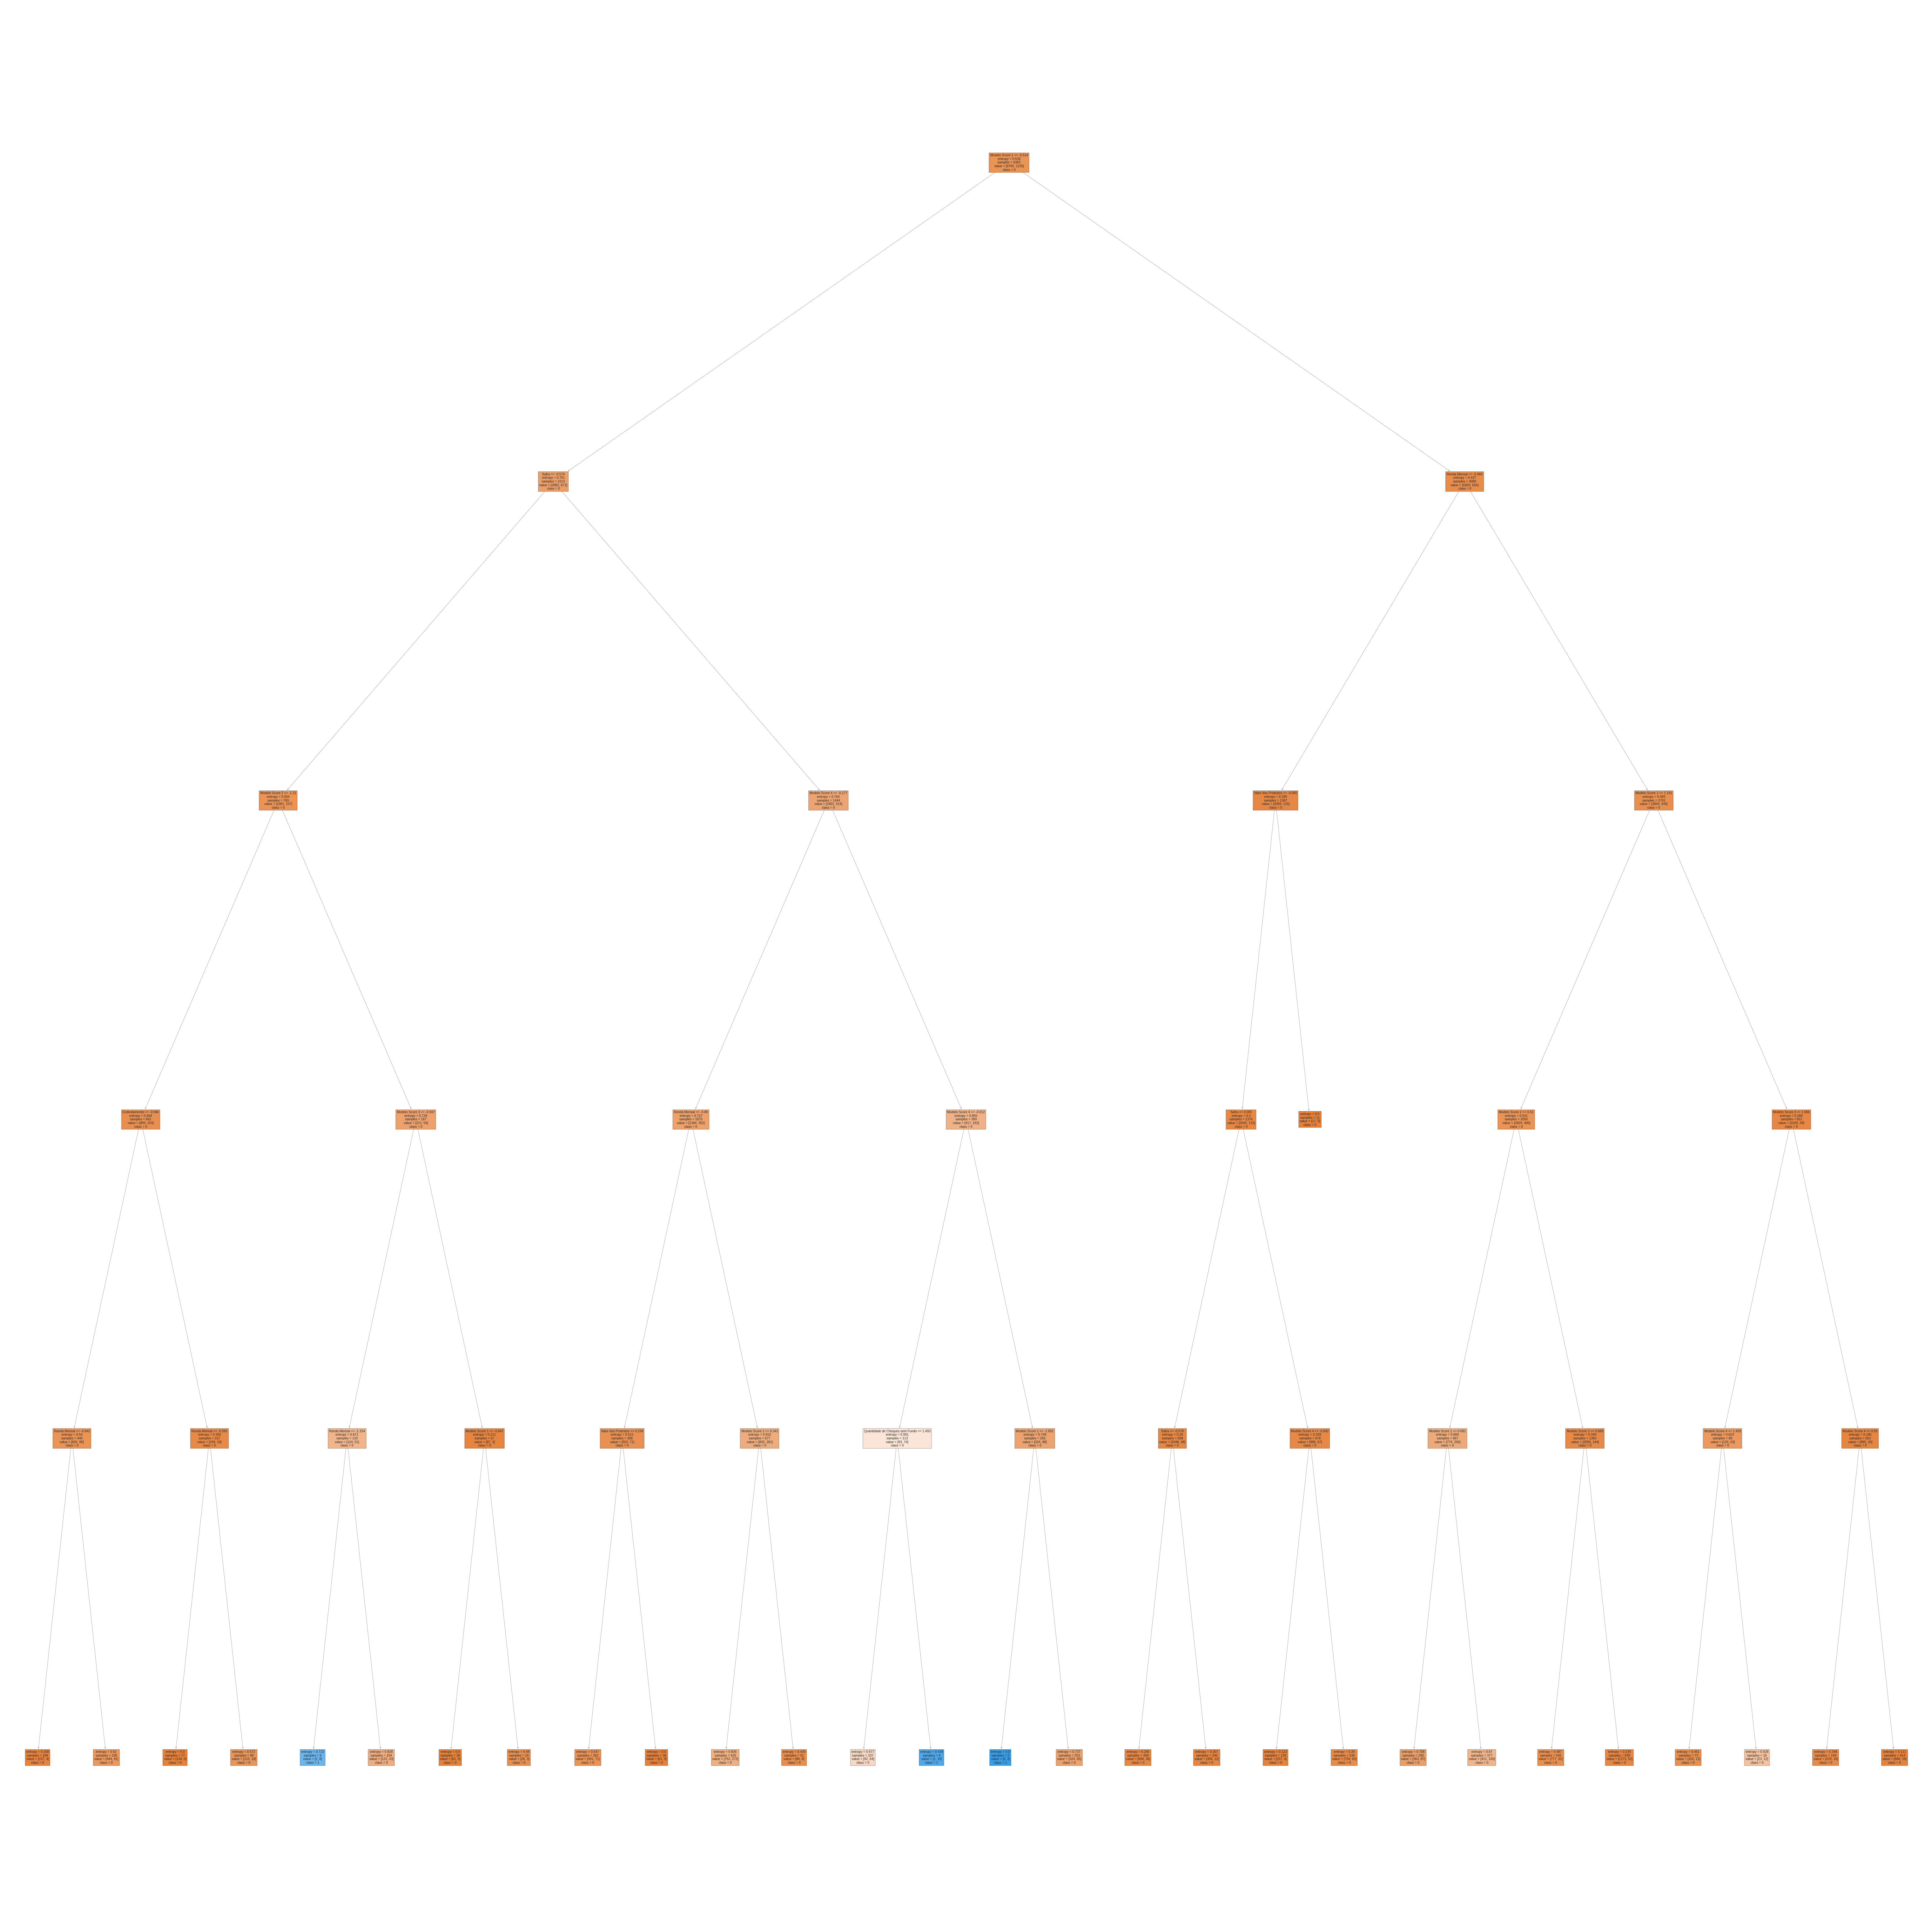

In [ ]:

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(80,80))
previsores = ['Safra','Estado','Renda Mensal', 'Endividamento','Quantidade de Cheques sem Fundo','Quantidade de Restritivos', 'Valor dos Restritivos', 'Quantidade de Protestos', 'Valor dos Protestos','Modelo Score 1', 'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4']
class_names_str = [str(cls) for cls in random_forest_original.classes_]
plot_tree(random_forest_original.estimators_[tree_to_visualize], filled=True, feature_names=previsores, class_names=class_names_str)
figura.savefig('arvore_random_forest_original.png')


0.9876666666666667

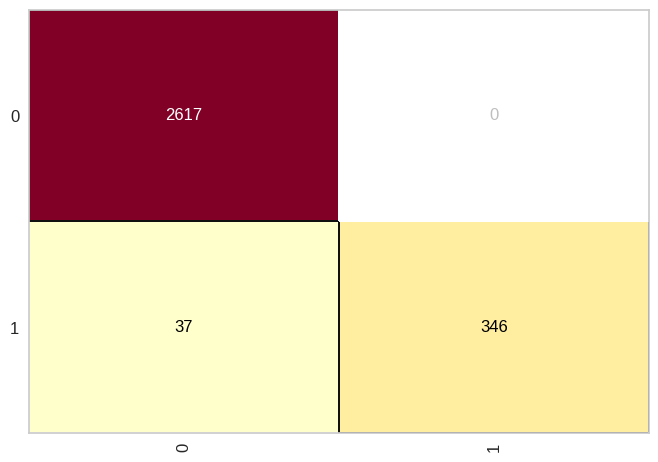

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_original)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Usando Arvore de Decisão com os dados originais

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_risco_original = DecisionTreeClassifier(criterion='entropy',max_depth=5)
arvore_risco_original.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
arvore_risco_original.feature_importances_

array([0.        , 0.01470957, 0.11908424, 0.        , 0.00943977,
       0.        , 0.        , 0.        , 0.00935493, 0.0509897 ,
       0.64623236, 0.04166565, 0.10852379])

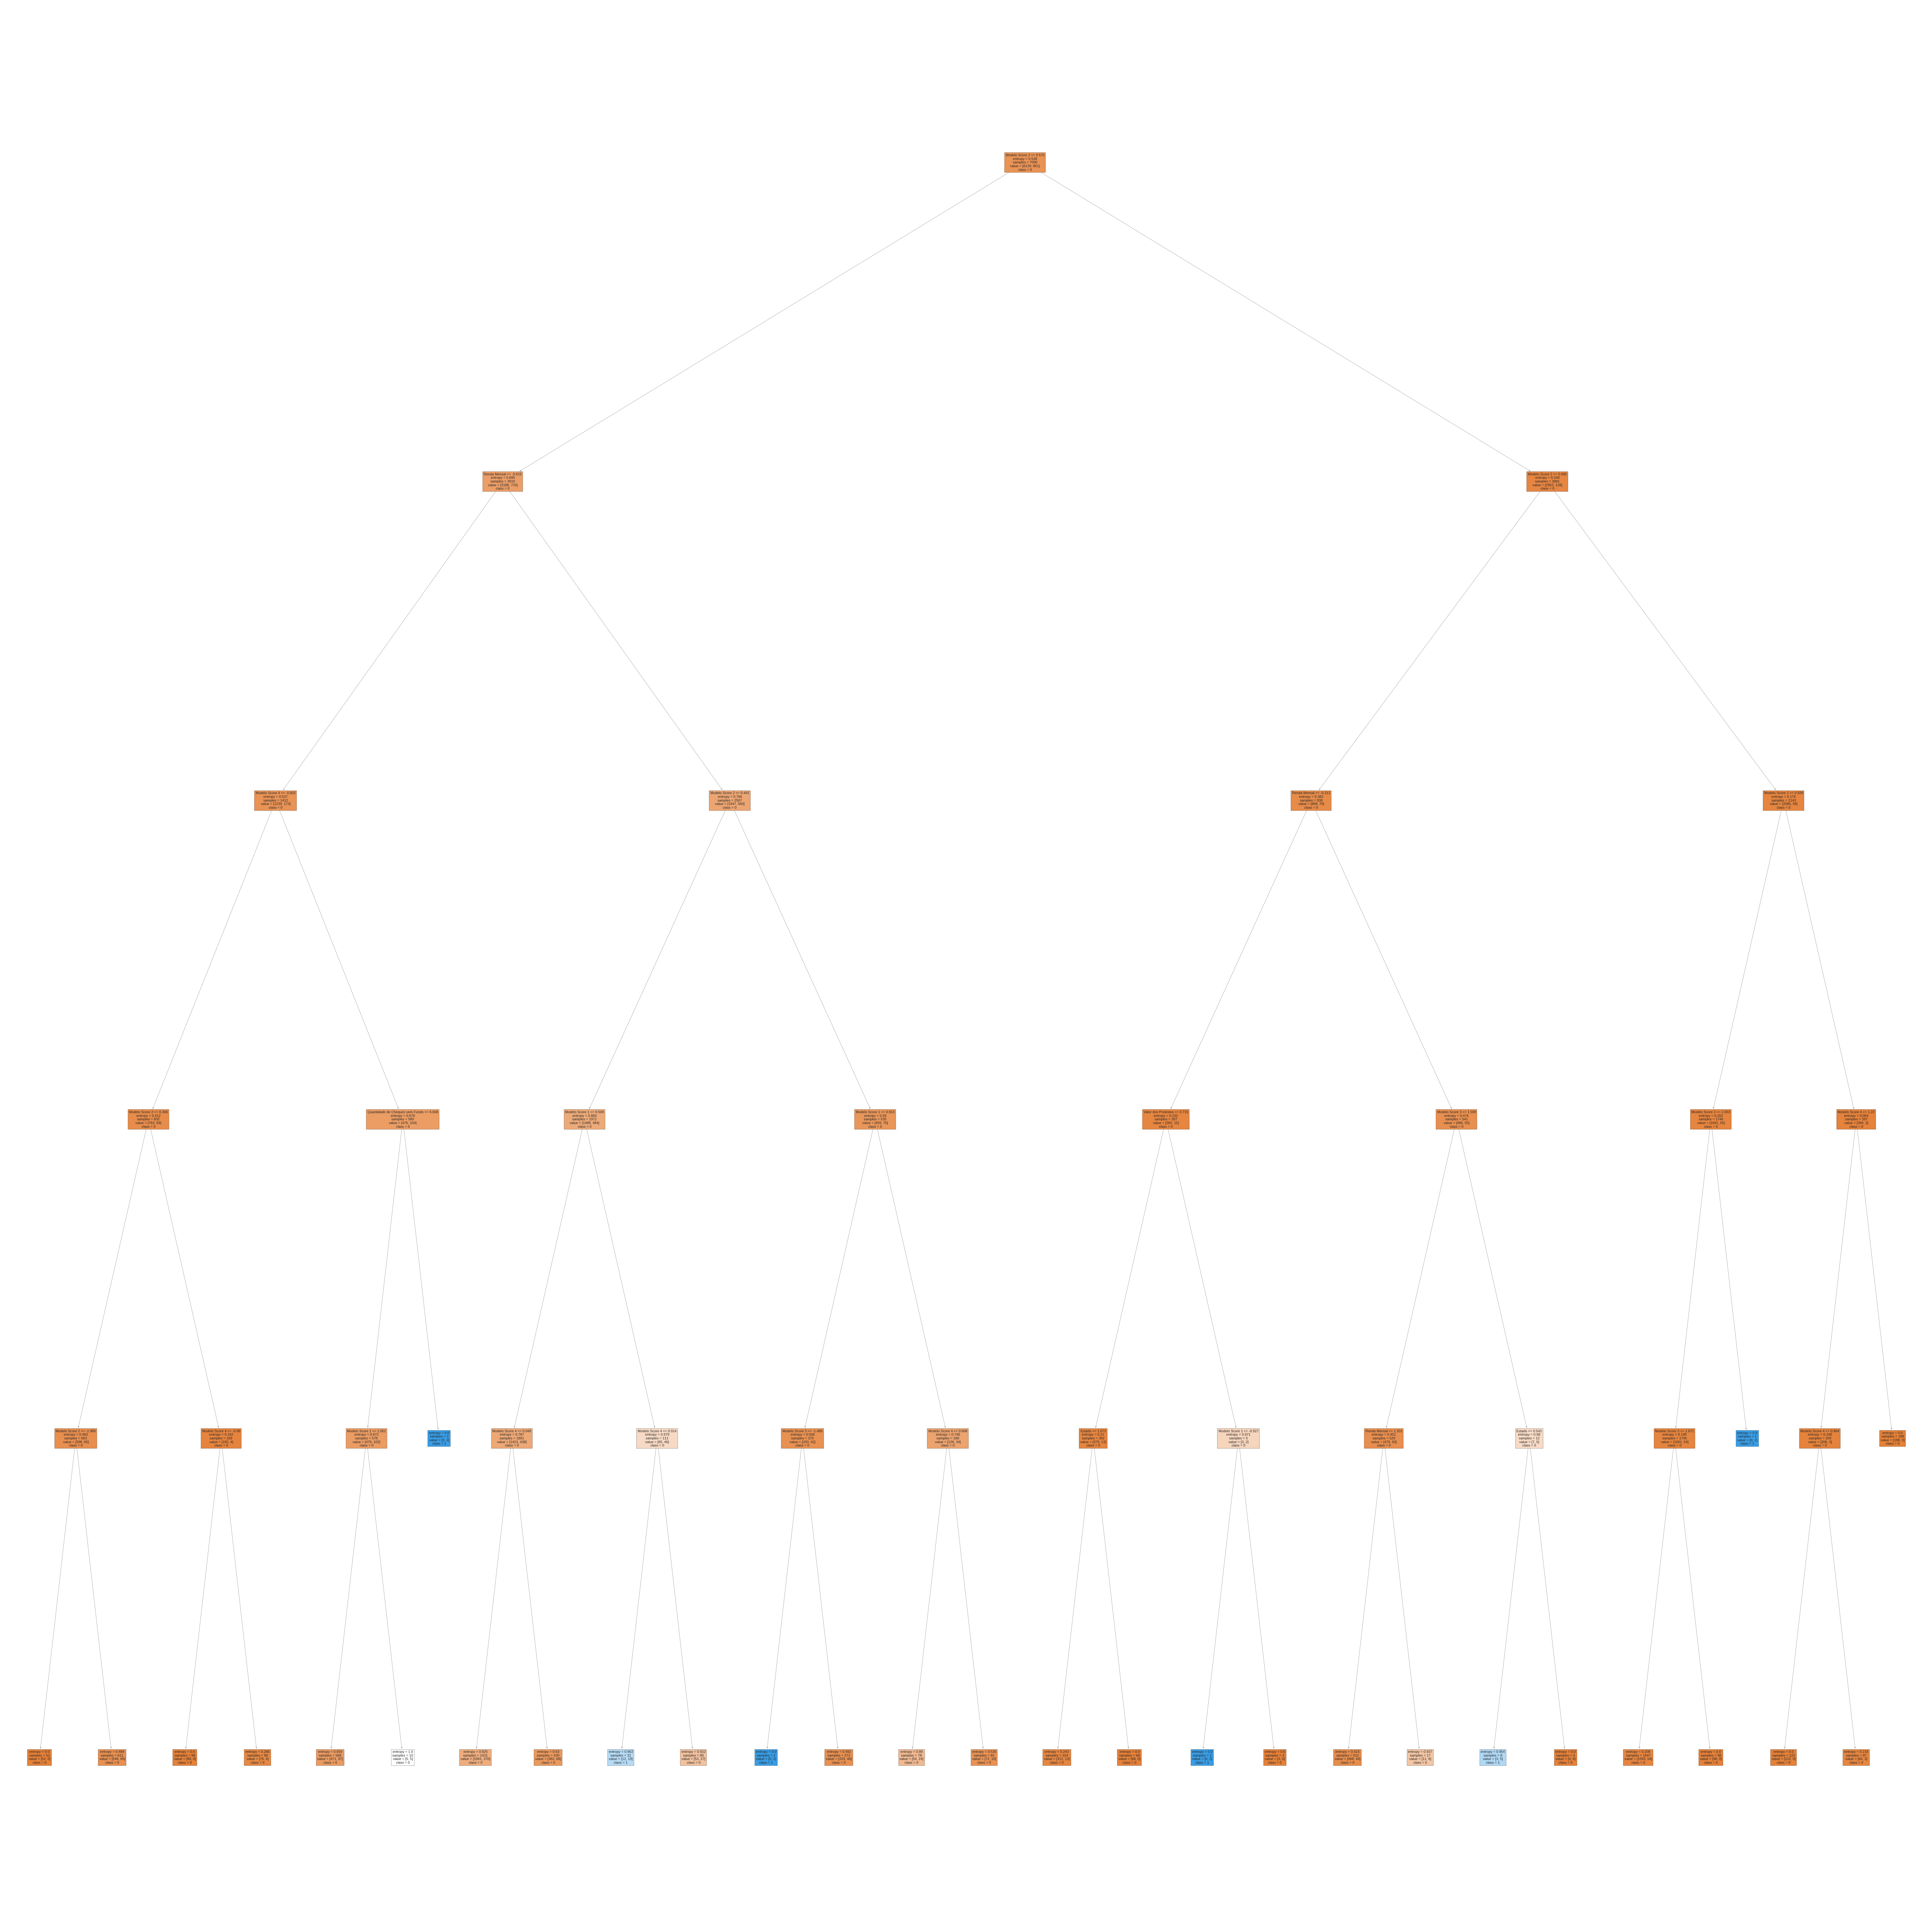

In [ ]:
from sklearn import tree
previsores = ['Safra','Estado','Renda Mensal', 'Endividamento','Quantidade de Cheques sem Fundo','Quantidade de Restritivos', 'Valor dos Restritivos', 'Quantidade de Protestos', 'Valor dos Protestos','Modelo Score 1', 'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(80,80))
class_names_str = [str(cls) for cls in arvore_risco_original.classes_]
tree.plot_tree(arvore_risco_original, feature_names=previsores, class_names=class_names_str, filled=True, ax=eixos)
figura.savefig('arvore_credit_original.png')

0.8696666666666667

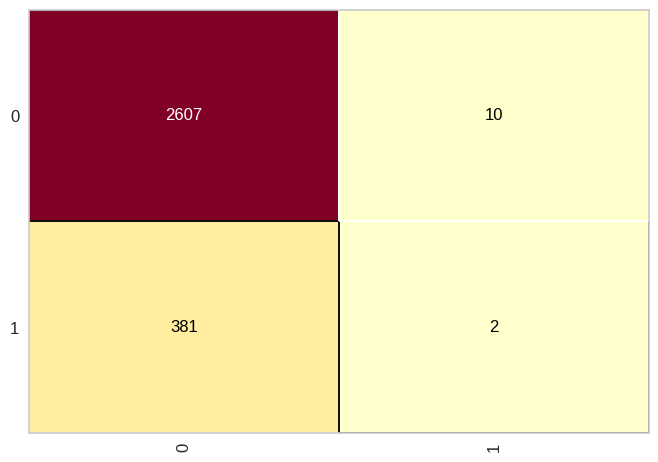

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_risco_original)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)